# Desafio Kaggle - Santander Customer Transaction Prediction

> Desafio em que será necessário prever a variável target do dataset.

* toc: true
* branch: master
* badges: false
* comments: false
* author: brn
* categories: [jupyter]

Para acessar esta competição no Kaggle [clique aqui](https://www.kaggle.com/c/santander-customer-transaction-prediction/overview)

Para baixar os dados [clique aqui](https://www.kaggle.com/c/santander-customer-transaction-prediction/data)

## Proposta do desafio

Nossa equipe de ciência de dados está desafiando continuamente nossos algoritmos de aprendizado de máquina, trabalhando com a comunidade global de dados científicos para garantir que possamos identificar com mais precisão novas maneiras de resolver nosso desafio mais comum, problemas de classificação binária como: um cliente está satisfeito? Um cliente comprará este produto? Um cliente pode pagar este empréstimo?

Neste desafio, convidamos os Kagglers a nos ajudar a identificar quais clientes farão uma transação específica no futuro, independentemente do volume de dinheiro transacionado. Os dados fornecidos para esta competição têm a mesma estrutura que os dados reais que temos disponíveis para resolver este problema.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# Métricas e otimização
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import  f1_score

from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [2]:
# pip freeze > requirements.txt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Awari/train.csv")
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Análise Explotarória 

In [ ]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
data.shape

(200000, 202)

In [ ]:
data.isna().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [ ]:
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


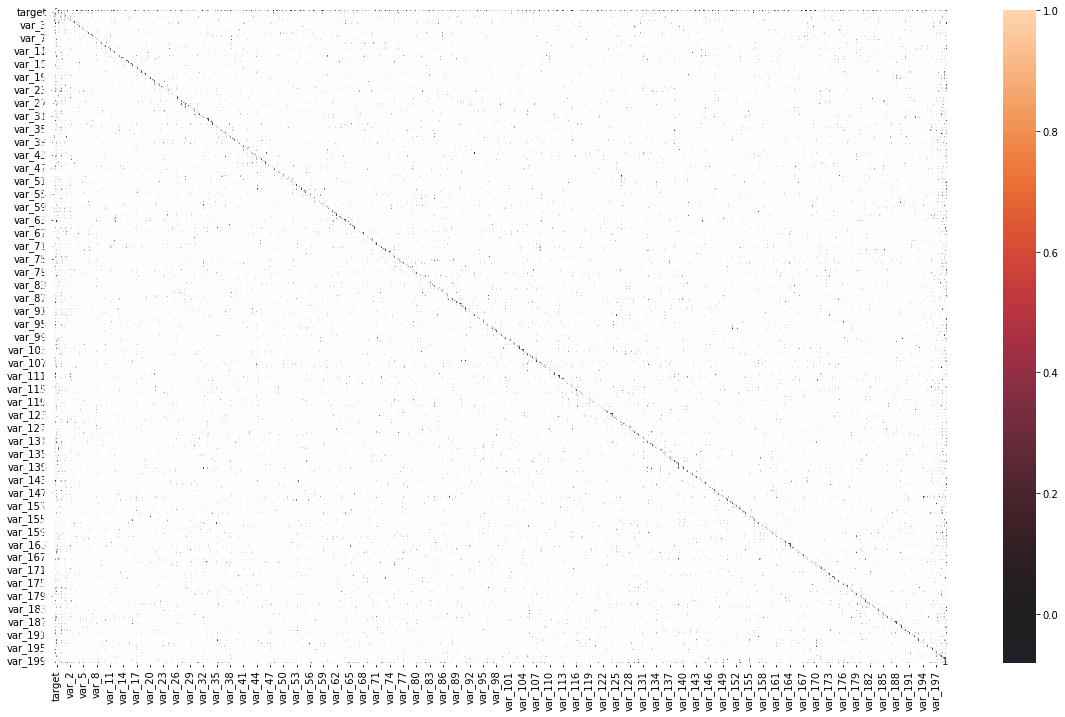

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(data=data.corr(), annot=True, center=0);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


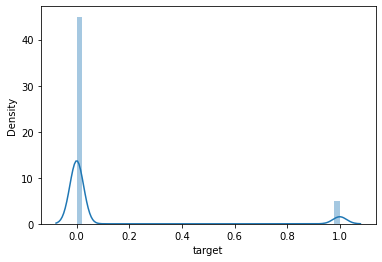

In [ ]:
sns.distplot(data['target']);

Podemos verificar que a variável alvo possui uma distribuição próxima a uma normal. Contudo, podemos notar a presenção de alguns outliers em torno de 50. 

É tarefa essencial verificar a distribuição não só da variável alvo, como de todo o conjunto. Isso porque discrepantes (outliers) podem confundir nosso modelo diminuindo a performance. Esta também é uma tarefa que pode consumir bastante tempo e você é encorajado à fazê-la.

## Avaliando o target

In [4]:
data['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Importante lembrar que em um problema de classificação caso os dados estejam desbalanceados, que é o caso, é preciso tomar alguma medidas para corrigir isso.

In [5]:
X = data.drop(columns=['ID_code', 'target'])
y = data['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Modelagem

### 1 - Regressão Logistica

O modelo usado como benchmark é o de Regressão Logistica por se tratar do modelo mais simples. 

In [ ]:
pipe_reglog = make_pipeline(StandardScaler(), LogisticRegression())
pipe_reglog.fit(X_train, y_train)
y_pred = pipe_reglog.predict(X_test)

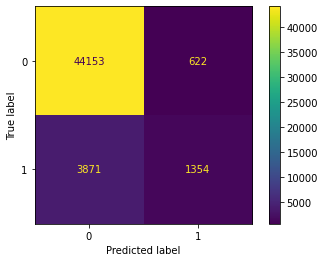

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.6852226720647774
Acuracia 0.91014
Recall 0.2591387559808612
Roc 0.622623537677756
f1 0.37605888071101234


#### Regressão Logistica + Balanceamento

In [ ]:
pipe_reglog = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
pipe_reglog.fit(X_train, y_train)
y_pred = pipe_reglog.predict(X_test)

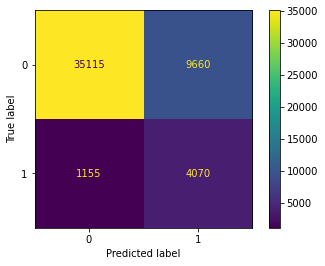

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.2964311726147123
Acuracia 0.7837
Recall 0.7789473684210526
Roc 0.7816009873931058
f1 0.42943814297019256


#### Regressão Logistica + Balanceamento + RFE

In [ ]:
pipe_rfe_reglog = make_pipeline(StandardScaler(), RFECV(LogisticRegression(class_weight='balanced'), step=1, cv=5), LogisticRegression(class_weight='balanced') )
pipe_rfe_reglog.fit(X_train, y_train)
y_pred = pipe_rfe_reglog.predict(X_test)

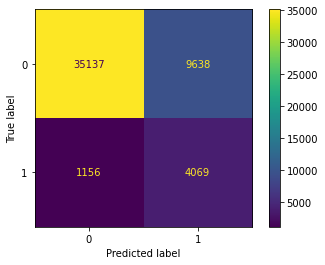

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.29685562121543735
Acuracia 0.78412
Recall 0.778755980861244
Roc 0.7817509664216885
f1 0.4298542150855694


### 2 - KNeighbors

In [ ]:
for i in range(1, 10):
    pipe_neigh = make_pipeline(KNeighborsClassifier(n_neighbors=i))
    pipe_neigh.fit(X_train, y_train)
    y_pred = pipe_neigh.predict(X_test)
    print(i)
    print('Roc', roc_auc_score(y_test, y_pred))
    print('----------------------------------')

1
Roc 0.5139041298998982
----------------------------------
2
Roc 0.5010827128732445
----------------------------------
3
Roc 0.5033996671288393
----------------------------------
4
Roc 0.500192937040332
----------------------------------
5
Roc 0.5008707011933672
----------------------------------
6
Roc 0.49993299832495813
----------------------------------
7
Roc 0.5000797181014055
----------------------------------
8
Roc 0.4999888330541597
----------------------------------
9
Roc 0.49996649916247904
----------------------------------


In [ ]:
pipe_neigh = make_pipeline(KNeighborsClassifier(n_neighbors=3))
pipe_neigh.fit(X_train, y_train)
y_pred = pipe_neigh.predict(X_test)

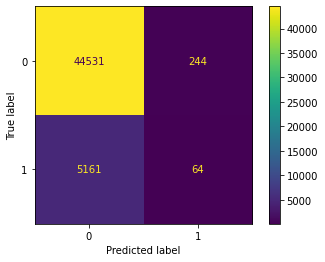

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.2077922077922078
Acuracia 0.8919
Recall 0.012248803827751197
Roc 0.5033996671288393
f1 0.0231339237303452


### 3 - SVM/SVC

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC())
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

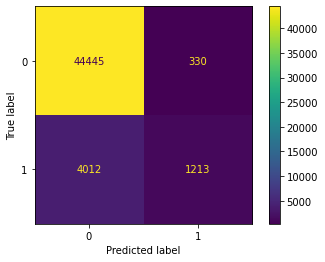

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.7861309138042774
Acuracia 0.91316
Recall 0.2321531100478469
Roc 0.6123914628966203
f1 0.35845153664302604


#### SVM/SVC + Balanceamento

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

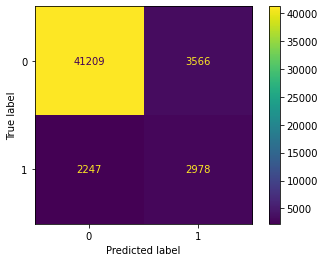

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.45507334963325186
Acuracia 0.88374
Recall 0.5699521531100479
Roc 0.745154747688469
f1 0.5060752825218796


### 4 - Árvore de Decisão

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

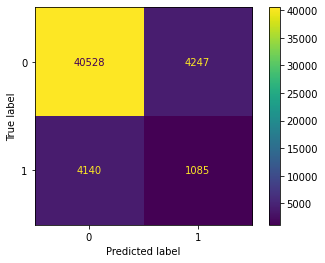

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.20348837209302326
Acuracia 0.83226
Recall 0.2076555023923445
Roc 0.5564017322123643
f1 0.20555081936156105


### 5 - Bagging (Árvore de Decisão)

In [ ]:
bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=13, min_samples_split=100)).fit(X_train, y_train)
y_pred = bdt.predict(X_test)

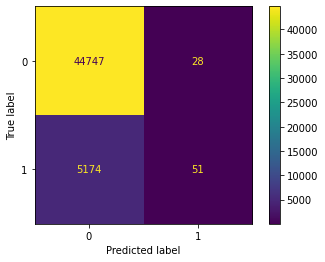

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.6455696202531646
Acuracia 0.89596
Recall 0.009760765550239234
Roc 0.5045677082915909
f1 0.01923076923076923


#### Bagging (Árvore de Decisão + Balanceamento)

In [ ]:
bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=13, min_samples_split=100, class_weight='balanced')).fit(X_train, y_train)
y_pred = bdt.predict(X_test)

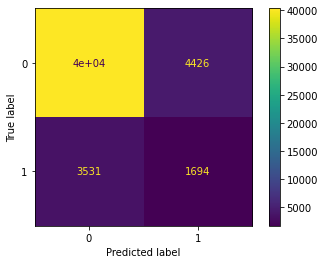

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.27679738562091505
Acuracia 0.84086
Recall 0.32421052631578945
Roc 0.6126803608686707
f1 0.2986337593653592


### 6 - Floresta Randomica

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

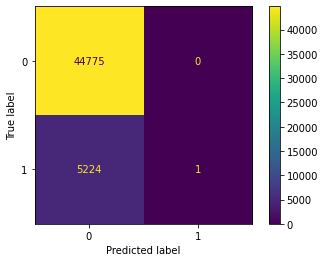

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 1.0
Acuracia 0.89552
Recall 0.00019138755980861245
Roc 0.5000956937799043
f1 0.00038270187523918874


#### Floresta Randomica + Balanceamento

In [ ]:
rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
y_pred = rf.predict(X_test)

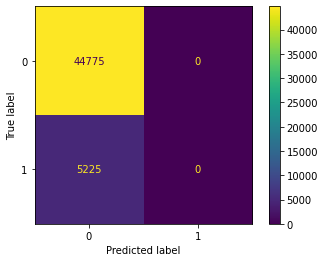

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.0
Acuracia 0.8955
Recall 0.0
Roc 0.5
f1 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 7 - AdaBoost

In [ ]:
ada = AdaBoostClassifier( DecisionTreeClassifier() )
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

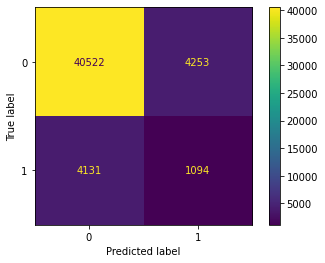

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.20460071067888536
Acuracia 0.83232
Recall 0.209377990430622
Roc 0.5571959745564612
f1 0.20696178584941352


### 8 - Gradient Boosting

In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

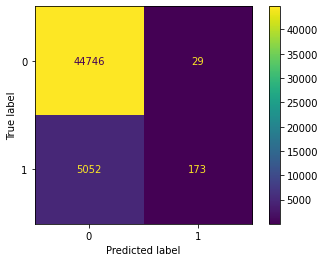

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.8564356435643564
Acuracia 0.89838
Recall 0.03311004784688995
Roc 0.516231182494076
f1 0.06375529758614334


### 9 - Lightgbm

In [ ]:
light = LGBMClassifier()
light.fit(X_train, y_train)
y_pred = light.predict(X_test)

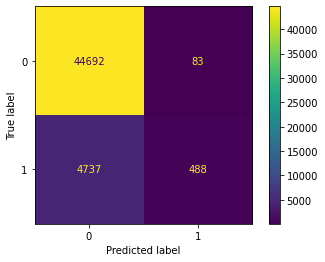

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.8546409807355516
Acuracia 0.9036
Recall 0.09339712918660287
Roc 0.5457717080885555
f1 0.168391994478951


In [ ]:
light = LGBMClassifier(
        metric = 'auc',
        objective = 'binary',
    )
light.fit(X_train, y_train)
y_pred = light.predict(X_test)

In [ ]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.8546409807355516
Acuracia 0.9036
Recall 0.09339712918660287
Roc 0.5457717080885555
f1 0.168391994478951


### Otimização de Hiperparâmetros

Selecionando o modelo com melhor resposta para a métrica ROC, vai ser utilizado o GredSearch para procurar os hiperparâmetros que maximizem essa métrica.

Por motivo de limitação no tempo de processamento do google colab, foi usada a busca de cada hiperparametro de forma individual, de forma que o tempo de processamento não passasse o limite do tempo gratuito.

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
# Modelo
pipe_rfe_reglog = Pipeline(
    [
        ("std", StandardScaler()), 
        ("RFE", RFECV(LogisticRegression(class_weight='balanced'), scoring='roc_auc')),
        ("class", LogisticRegression(class_weight='balanced'))
    ]
)

In [ ]:
params = {
    'RFE__step' : [1, 2, 3, 4, 5]#,
    #'RFE__cv' : [3, 4, 5, 6, 7],
    #'RFE__min_features_to_select': [1, 2, 3],
    #'class__multi_class': ['auto', 'ovr', 'multinomial']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

{'RFE__step': 5}

In [ ]:
params = {
    #'RFE__step' : [1, 2, 3, 4, 5],
    'RFE__cv' : [3, 4, 5, 6, 7]#,
    #'RFE__min_features_to_select': [1, 2, 3],
    #'class__multi_class': ['auto', 'ovr', 'multinomial']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

{'RFE__cv': 6}

In [9]:
params = {
    #'RFE__step' : [1, 2, 3, 4, 5],
    #'RFE__cv' : [3, 4, 5, 6, 7],
    'RFE__min_features_to_select': [1, 2, 3]#,
    #'class__multi_class': ['auto', 'ovr', 'multinomial']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

{'RFE__min_features_to_select': 1}

In [10]:
params = {
    #'RFE__step' : [1, 2, 3, 4, 5],
    #'RFE__cv' : [3, 4, 5, 6, 7],
    #'RFE__min_features_to_select': [1, 2, 3],
    'class__multi_class': ['auto', 'ovr', 'multinomial']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

{'class__multi_class': 'auto'}

In [11]:
params = {
    #'RFE__n_features_to_select' : [1, 2, 3],
    'RFE__step' : [5, 6, 7]#,
    #'class__penalty': ['l1','l2'],
    #'class__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #'class__multi_class': ['auto', 'ovr', 'multinomial']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

{'RFE__step': 7}

In [12]:
params = {
    #'RFE__n_features_to_select' : [1, 2, 3],
    #'RFE__step' : [5, 6, 7],
    'class__penalty': ['l1','l2']#,
    #'class__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #'class__multi_class': ['auto', 'ovr', 'multinomial']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

{'class__penalty': 'l2'}

In [10]:
params = {
    #'RFE__n_features_to_select' : [1, 2, 3],
    #'RFE__step' : [5, 6, 7],
    #'class__penalty': ['l1','l2'],
    'class__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]#,
    #'class__multi_class': ['auto', 'ovr', 'multinomial']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

KeyboardInterrupt: ignored

In [9]:
params = {
    #'RFE__n_features_to_select' : [1, 2, 3],
    'RFE__step' : [7, 8, 9, 10]#,
    #'class__penalty': ['l1','l2'],
    #'class__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #'class__multi_class': ['auto', 'ovr', 'multinomial']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

{'RFE__step': 9}

In [11]:
params = {
    'RFE__step' : [9],
    'RFE__cv' : [6],
    'RFE__min_features_to_select': [1],
    'class__penalty': ['l2'],
    #'class__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class__multi_class': ['auto']
}

#Grid
grid = GridSearchCV(pipe_rfe_reglog, 
                    params, 
                    #cv = 20, 
                    scoring = 'roc_auc')
#Fit do Grid
grid.fit(X_train, y_train)


grid.best_params_

{'RFE__cv': 6,
 'RFE__min_features_to_select': 1,
 'RFE__step': 9,
 'class__multi_class': 'auto',
 'class__penalty': 'l2'}

In [12]:
modelo = grid.best_estimator_
y_pred = modelo.predict(X_test)

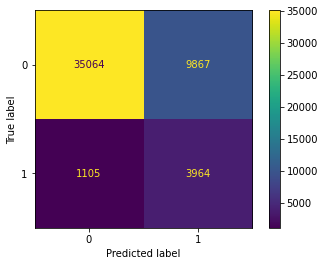

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [14]:
print('Precision', precision_score(y_test, y_pred))
print('Acuracia', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Roc', roc_auc_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

Precision 0.28660255946786206
Acuracia 0.78056
Recall 0.7820082856579207
Roc 0.7812024468951952
f1 0.4194708994708995


Mesmo com a melhoria dos Hiperparametros usando o gridsearh o resultado não apresentou uma melhora, na verdade, a partir da terceira casa decimal esta menor que o resultado original.